## Importing the Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Display the first few rows of each dataframe
print(customers_df.head())
print(products_df.head())
print(transactions_df.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [3]:
# Merge Transactions with Customers
trans_cust_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='left')

# Merge the result with Products
full_df = pd.merge(trans_cust_df, products_df, on='ProductID', how='left')

# Check the merged dataframe
print(full_df.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [4]:
# Convert 'TransactionDate' and 'SignupDate' to datetime format
full_df['TransactionDate'] = pd.to_datetime(full_df['TransactionDate'])
full_df['SignupDate'] = pd.to_datetime(full_df['SignupDate'])

# Drop redundant columns if any
full_df.drop(columns=['Price_x'], inplace=True)  # Since Price_x and Price_y are duplicates, we are keeping one
full_df.rename(columns={'Price_y': 'Price'}, inplace=True)  


## MONTHLY SALES TREND

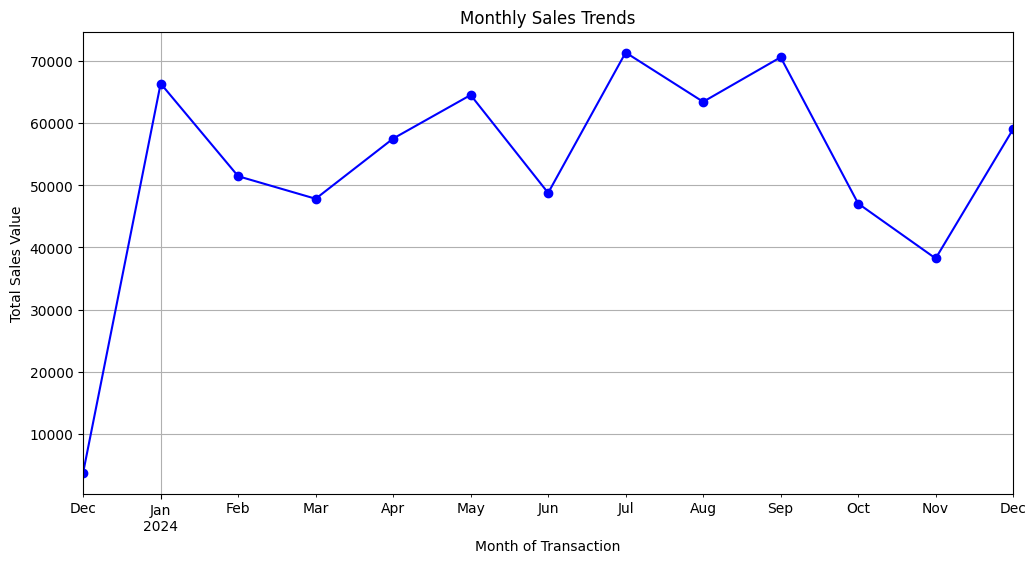

In [5]:
# Aggregate sales data by month
monthly_sales = full_df.groupby(full_df['TransactionDate'].dt.to_period("M"))['TotalValue'].sum()

# Plot
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title('Monthly Sales Trends')
plt.xlabel('Month of Transaction')
plt.ylabel('Total Sales Value')
plt.grid(True)
plt.show()


## CUSTOMER PURCHASE FREQUENCY

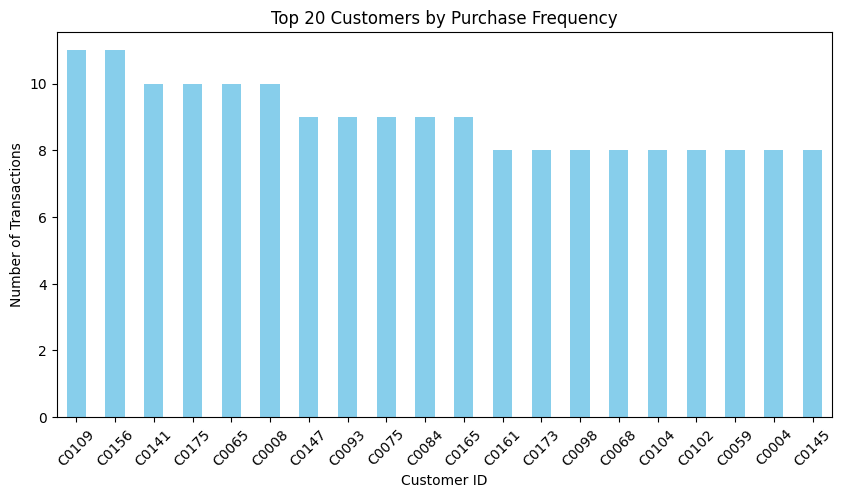

In [6]:
# Count the number of transactions per customer
customer_freq = full_df['CustomerID'].value_counts()

# Plot
plt.figure(figsize=(10, 5))
customer_freq.head(20).plot(kind='bar', color='skyblue')  # Show top 20 customers
plt.title('Top 20 Customers by Purchase Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


## ANALYSIS OF SALES BY REGION

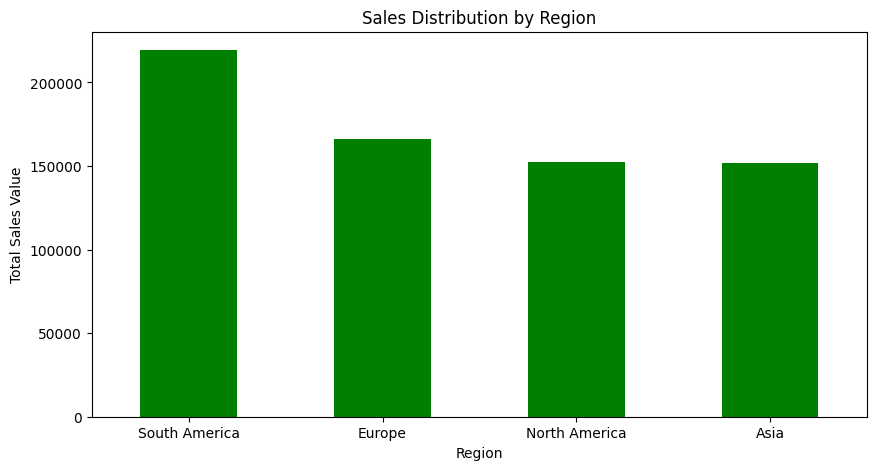

In [7]:
# Sum of sales per region
sales_by_region = full_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sales_by_region.plot(kind='bar', color='green')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=0)
plt.show()


# Calculate CLV (TotalValue per Customer)

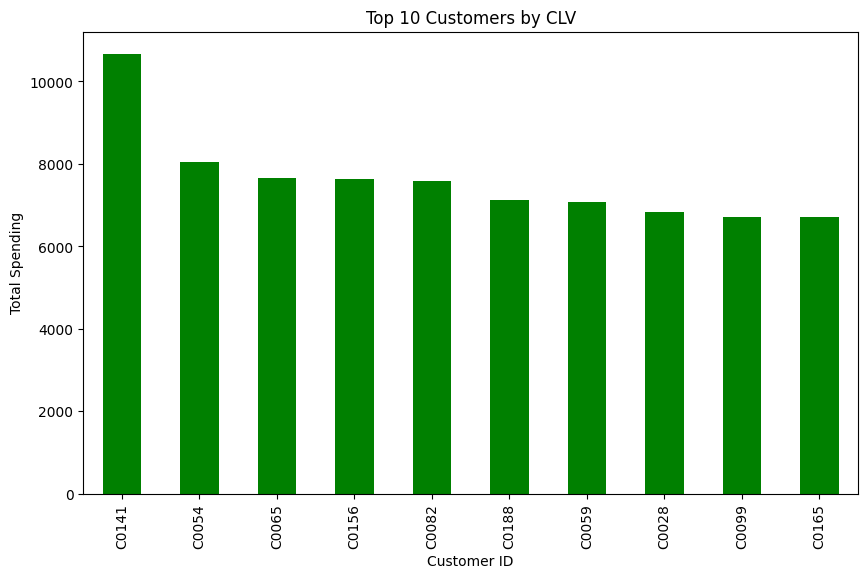

In [8]:

clv = full_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)

# Plot top 10 customers by CLV
plt.figure(figsize=(10, 6))
clv.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Customers by CLV')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending')
plt.show()

## PRODUCT CATEGORY PERFORMANCE

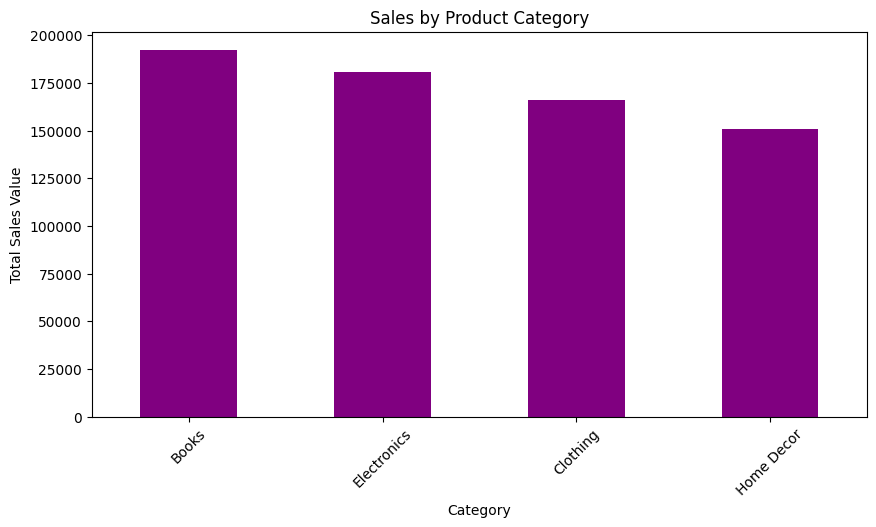

In [7]:
# Sales by product category
category_sales = full_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 5))
category_sales.plot(kind='bar', color='purple')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.show()


## Customer Acquistion Trends 

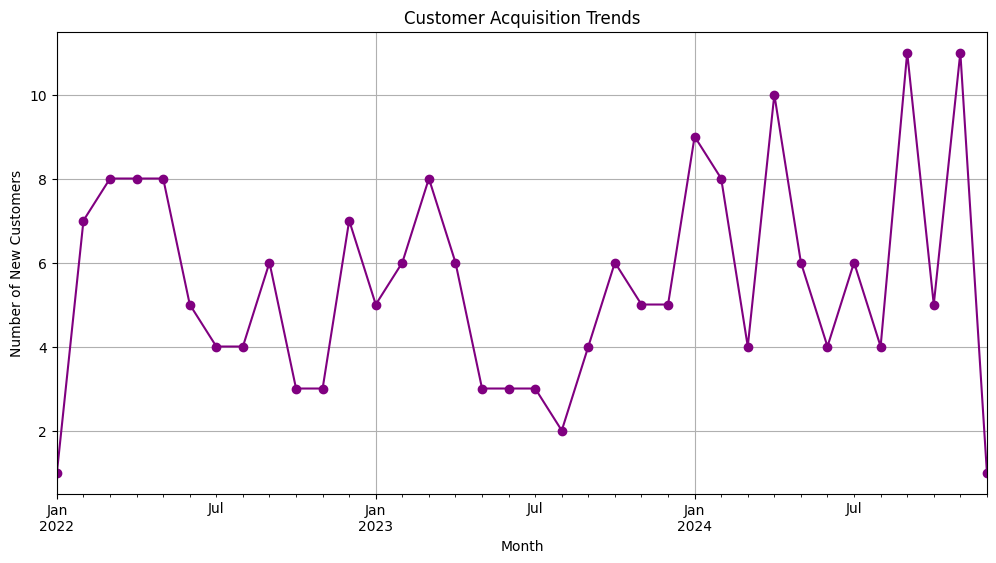

In [9]:
# Group by SignupDate and count unique CustomerIDs
customer_acquisition = full_df.groupby(full_df['SignupDate'].dt.to_period("M"))['CustomerID'].nunique()

# Plot
plt.figure(figsize=(12, 6))
customer_acquisition.plot(kind='line', marker='o', color='purple')
plt.title('Customer Acquisition Trends')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.grid(True)
plt.show()